# Restricted Boltzmann Machine (Image Feature Extraction)
> The knife image dataset contains 400 train images, and 100 test images, of knives presented from various hand-held and non-held positions. In the following analysis I will use a **Restricted Boltzmann Machine (RBM)** to extract features. Since all the images in this dataset are knives, I will not be testing classification accuracy. Instead, this is just a feature extraction visualization exercise.

In [109]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics

from skimage.transform import resize
from skimage.io import imread_collection, imshow

In [347]:
# Read in a sample of the images and determine the width and height of the first image
n_images = 30 #Example value
image_names = ["../Downloads/knife/train/knife_{0}.jpg".format(k) for k in range(n_images)]

imgs = imread_collection(image_names)
print(f"Imported {len(imgs)} images.")
print(f"Dimensions of the first image are {imgs[0].shape[0]} x {imgs[0].shape[1]}")

Imported 30 images.
Dimensions of the first image are 100 x 100


In [348]:
# Confirming all images are the same size

size = {}
for idx in range(len(imgs)):
    width, height = imgs[idx].shape[0], imgs[idx].shape[1]
    if width != 100 or height != 100:
        size.update({width:height})
print(size)

{}


In [349]:
# Converting the images to grayscale
images = []
for idx in range(len(imgs)):
    images.append(imgs[idx][:,:,0])

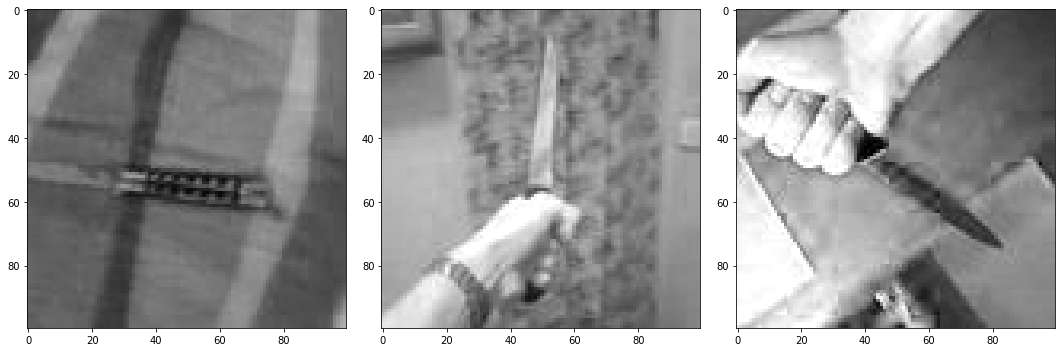

In [350]:
# Image Examples
plt.figure(figsize=(15,5))

plt.subplot(131)
imshow(images[1])

plt.subplot(132)
imshow(images[2])

plt.subplot(133)
imshow(images[10])
plt.show()

In [351]:
#Flatten all images to arrays
imgsarr = [x.flatten('C') for x in images]

# Feature Extraction

In [352]:
# Creating random classes for the model to be able to run
Y = [[_ for i in range(0,1)] for _ in range(0,len(images))]
Y = [num for sub in Y for num in sub]

In [353]:
# Models we will use
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial')
rbm = BernoulliRBM(random_state=0, verbose=True)

rbm_features_classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logreg)])

In [354]:
# Training RBM-Logistic Pipeline
rbm_features_classifier.fit(imgsarr, Y)

[BernoulliRBM] Iteration 1, pseudo-likelihood = 0.00, time = 0.17s
[BernoulliRBM] Iteration 2, pseudo-likelihood = 0.00, time = 0.17s
[BernoulliRBM] Iteration 3, pseudo-likelihood = 0.00, time = 0.18s
[BernoulliRBM] Iteration 4, pseudo-likelihood = 0.00, time = 0.22s
[BernoulliRBM] Iteration 5, pseudo-likelihood = 0.00, time = 0.23s
[BernoulliRBM] Iteration 6, pseudo-likelihood = 0.00, time = 0.21s
[BernoulliRBM] Iteration 7, pseudo-likelihood = 0.00, time = 0.21s
[BernoulliRBM] Iteration 8, pseudo-likelihood = 0.00, time = 0.18s
[BernoulliRBM] Iteration 9, pseudo-likelihood = 0.00, time = 0.18s
[BernoulliRBM] Iteration 10, pseudo-likelihood = 0.00, time = 0.17s


Pipeline(memory=None,
         steps=[('rbm',
                 BernoulliRBM(batch_size=10, learning_rate=0.1,
                              n_components=256, n_iter=10, random_state=0,
                              verbose=True)),
                ('logistic',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='multinomial', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

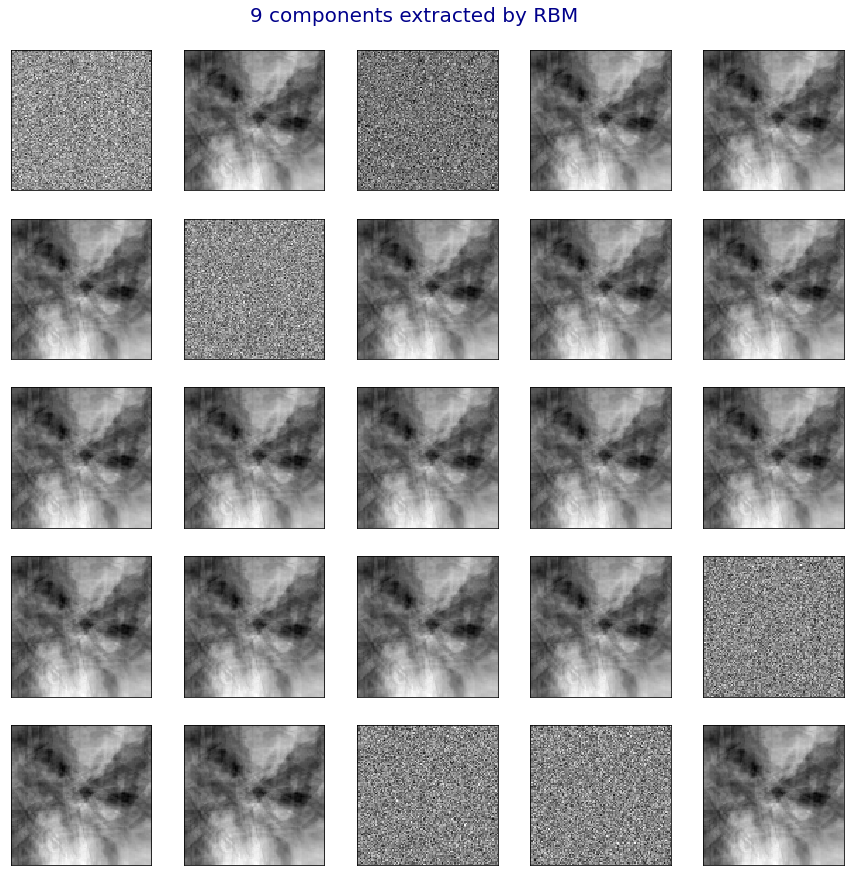

In [355]:
#Let's view the 150 components created by the RBM

plt.figure(figsize=(15, 15))
for i, comp in enumerate(rbm.components_[:25]):
    plt.subplot(5, 5, i + 1)
    plt.imshow(comp.reshape((100, 100)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('9 components extracted by RBM', y=0.92, fontsize=20, c='darkblue')

plt.show()

#### Although nonsensical to the human eye, these features/hidden components can still contain predictive power for image classification. Some of the images seem to have faint edges of knives, but even the  'snow', tv-static looking images, completely unrecognizable, can combine with components in the hidden layer to make predictions or recreate the original images. What's hard to tell is if there is any difference between the non-static looking images.